In [4]:
%matplotlib inline

In [1]:
from graphviz import Digraph

#### Comparison of $TqR$-RF and $TqR$-NN ensemble

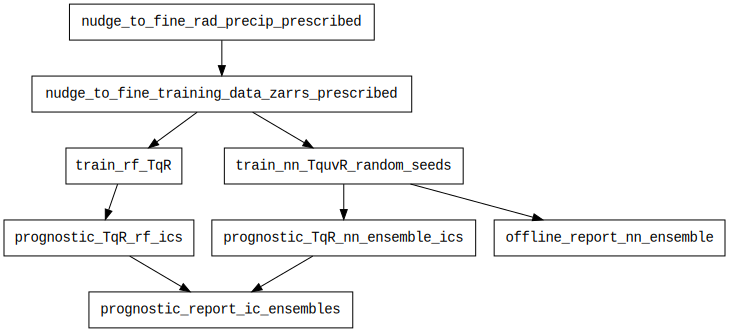

In [59]:
dag = Digraph(node_attr={'shape': 'rectangle', 'fontname': 'courier'})

fig_kwargs = {
    "shape": "oval", 
    "color": "blue",
    "fontcolor": "blue",
    "fontname": "helvetica"
}

# workflow steps
dag.node(name="nudging-run", label="nudge_to_fine_rad_precip_prescribed")
dag.node(name="train-data-zarrs", label="nudge_to_fine_training_data_zarrs_prescribed")
dag.node(name="train-rf", label="train_rf_TqR")
dag.node(name="train-nn-seeds", label="train_nn_TquvR_random_seeds")

dag.node(name="prog-nn-ensemble", label="prognostic_TqR_nn_ensemble_ics")
#dag.node(name="prog-nn-seeds", label="prognostic_TquvR_nn_random_seeds")

dag.node(name="nn-ensemble-offline-report", label="offline_report_nn_ensemble")


dag.node(name="prog-rf", label="prognostic_TqR_rf_ics")

dag.node(name="prog-report", label="prognostic_report_ic_ensembles")
#dag.node(name="prog-report-nn-seeds", label="prognostic_report_nn_seeds")


dag.edges(
    [
        ("nudging-run", "train-data-zarrs"),
        ("train-data-zarrs", "train-rf"),
        ("train-data-zarrs", "train-nn-seeds"),
        ("train-nn-seeds", "nn-ensemble-offline-report"),
        ("train-rf", "prog-rf"),
        ("train-nn-seeds", "prog-nn-ensemble"),
        #("train-nn-seeds", "prog-nn-seeds"),
        ("prog-rf", "prog-report"),
        ("prog-nn-ensemble", "prog-report"),
        #("prog-nn-seeds", "prog-report-nn-seeds"),
        
    ]
)
dag.render("../main-experiment-dag", view=True, format="png", cleanup=True)
dag

#### Ablation study

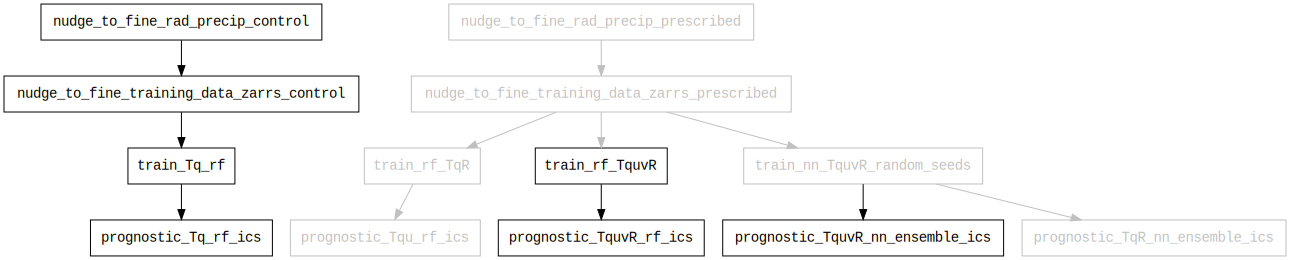

In [60]:
dag = Digraph(node_attr={'shape': 'rectangle', 'fontname': 'courier'})

done_kwargs = {
    "color": "grey",
    "fontcolor": "grey",
}

dag.node(name="nudging-run-control", label="nudge_to_fine_rad_precip_control")
dag.node(name="nudging-run-prescribed", label="nudge_to_fine_rad_precip_prescribed", **done_kwargs)

dag.node(name="train-data-zarrs-control", label="nudge_to_fine_training_data_zarrs_control")
dag.node(name="train-data-zarrs-prescribed", label="nudge_to_fine_training_data_zarrs_prescribed", **done_kwargs)

dag.node(name="Tq-RF-train", label="train_Tq_rf")
dag.node(name="Tq-RF-prog", label="prognostic_Tq_rf_ics")

dag.node(name="TqR-RF-train", label="train_rf_TqR", **done_kwargs)
dag.node(name="TqR-RF-prog", label="prognostic_Tqu_rf_ics", **done_kwargs)

dag.node(name="TquvR-RF-train", label="train_rf_TquvR")
dag.node(name="TquvR-RF-prog", label="prognostic_TquvR_rf_ics")

dag.node(name="TquvR-NN-train", label="train_nn_TquvR_random_seeds", **done_kwargs)
dag.node(name="TquvR-NN-prog", label="prognostic_TquvR_nn_ensemble_ics")

dag.node(name="TqR-NN-prog", label="prognostic_TqR_nn_ensemble_ics", **done_kwargs)


dag.edge("nudging-run-control", "train-data-zarrs-control")
dag.edge("train-data-zarrs-control", "Tq-RF-train")

dag.edge("Tq-RF-train", "Tq-RF-prog")

dag.edge("nudging-run-prescribed", "train-data-zarrs-prescribed", **done_kwargs)

dag.edge("train-data-zarrs-prescribed", "TqR-RF-train", **done_kwargs)
dag.edge("TqR-RF-train", "TqR-RF-prog", **done_kwargs)

dag.edge("train-data-zarrs-prescribed", "TquvR-RF-train", **done_kwargs)
dag.edge("TquvR-RF-train", "TquvR-RF-prog")

dag.edge("train-data-zarrs-prescribed", "TquvR-NN-train", **done_kwargs)
dag.edge("TquvR-NN-train", "TquvR-NN-prog")


dag.edge("TquvR-NN-train", "TqR-NN-prog", **done_kwargs)

dag.render("../ablation-study-dag", view=True, format="png", cleanup=True)
dag

#### Timescale sensitivity

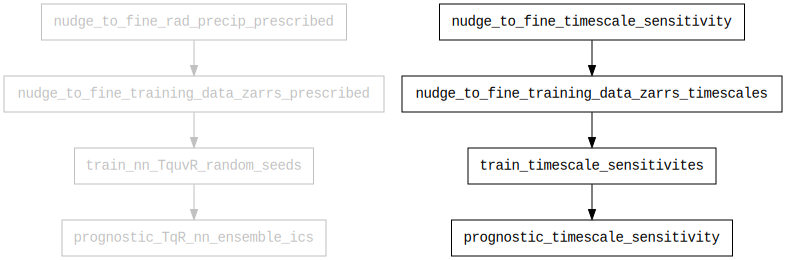

In [61]:
dag = Digraph(node_attr={'shape': 'rectangle', 'fontname': 'courier'})

done_kwargs = {
    "color": "grey",
    "fontcolor": "grey",
}

dag.node(name="nudging-run-prescribed", label="nudge_to_fine_rad_precip_prescribed", **done_kwargs)
dag.node(name="train-data-zarrs-prescribed", label="nudge_to_fine_training_data_zarrs_prescribed", **done_kwargs)
dag.node(name="3hr-TquvR-NN-train", label="train_nn_TquvR_random_seeds", **done_kwargs)
dag.node(name="3hr-TqR-NN-prog", label="prognostic_TqR_nn_ensemble_ics", **done_kwargs)


dag.node(name="nudging-run-timescales", label="nudge_to_fine_timescale_sensitivity")
dag.node(name="train-data-zarrs-timescales", label="nudge_to_fine_training_data_zarrs_timescales")
dag.node(name="timescales-NN-train", label="train_timescale_sensitivites")
dag.node(name="timescales-NN-prog", label="prognostic_timescale_sensitivity")



dag.edge("nudging-run-prescribed", "train-data-zarrs-prescribed", **done_kwargs)
dag.edge("train-data-zarrs-prescribed", "3hr-TquvR-NN-train", **done_kwargs)
dag.edge("3hr-TquvR-NN-train", "3hr-TqR-NN-prog", **done_kwargs)

dag.edge("nudging-run-timescales", "train-data-zarrs-timescales")
dag.edge("train-data-zarrs-timescales", "timescales-NN-train")
dag.edge("timescales-NN-train", "timescales-NN-prog")

dag.render("../timescale-sensitivity-dag", view=True, format="png", cleanup=True)

dag

#### NN random seeds variability

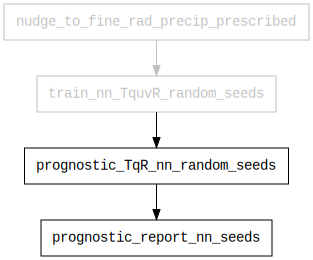

In [37]:
dag = Digraph(node_attr={'shape': 'rectangle', 'fontname': 'courier'})

done_kwargs = {
    "color": "grey",
    "fontcolor": "grey",
}

dag.node(name="nudging-run-prescribed", label="nudge_to_fine_rad_precip_prescribed", **done_kwargs)
dag.node(name="TquvR-NN-train", label="train_nn_TquvR_random_seeds", **done_kwargs)
dag.node(name="TqR-NN-prog-seeds", label="prognostic_TqR_nn_random_seeds")
dag.node(name="TqR-NN-seeds-prog-report", label="prognostic_report_nn_seeds")





dag.edge("nudging-run-prescribed", "TquvR-NN-train", **done_kwargs)
dag.edge("TquvR-NN-train", "TqR-NN-prog-seeds")
dag.edge("TqR-NN-prog-seeds", "TqR-NN-seeds-prog-report")

dag